# Nobel prizes

# 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [1]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...

# Reading in the Nobel Prize data
nobel = ... 

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
import pandas as pd
nobel = pd.read_csv("nobel.csv")
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB
None


In [4]:
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

The nobel dataset has 911 entries, some of which have missing values

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [5]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...

In [6]:
nobel['prize_share'].value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

In [7]:
nobel['sex'].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [8]:
nobel["birth_country"].value_counts()

United States of America                         259
United Kingdom                                    85
Germany                                           61
France                                            51
Sweden                                            29
Japan                                             24
Canada                                            18
Netherlands                                       18
Italy                                             17
Russia                                            17
Switzerland                                       16
Austria                                           14
Norway                                            12
China                                             11
Denmark                                           11
Australia                                         10
Belgium                                            9
South Africa                                       9
Scotland                                      

Which countries win most often?

* United States of America                    259
* United Kingdom                               85
* Germany                                      61
* France                                       51
* Sweden                                       29
* Japan                                        24
* Netherlands                                  18
* Canada                                       18
* Russia                                       17
* Italy                                        17

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [9]:
# Calculating the proportion of USA born winners per decade
import numpy as np
nobel['usa_born_winner'] = nobel['birth_country'] == "United States of America"

#nobel['decade'] = np.floor(nobel.groupby('year')).astype(int)
import math
nobel['decade'] = (np.floor(nobel.year / 10.0) * 10).astype(int)
#print(nobel['decade'])
prop_usa_winners = nobel.groupby('decade')["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
print(prop_usa_winners)

decade
1900    0.017544
1910    0.075000
1920    0.074074
1930    0.250000
1940    0.302326
1950    0.291667
1960    0.265823
1970    0.317308
1980    0.319588
1990    0.403846
2000    0.422764
2010    0.292683
Name: usa_born_winner, dtype: float64


Floor fucntion helped up round up the numer value of the 'year' to the nearest integer below the given value.i.e 1901-2016. 

We needed to round up the value of the year because to get to avg usa_born_winner per decade, the years 1901 to 2016 have to be split to decades.i.e 10 years make up 1 decade.

Hence,nobel['decade'] = np.floor(nobel.year / 10.0) * 10.astype(int) to get the rounded up decade values.

sum() function adds all the values that occur in a given decade,
whereas mean() funtiongives us the average value in a given decade.

next time use lambda doe!!!

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

Text(0.5, 1.0, 'The Proportion of US winners per decade')

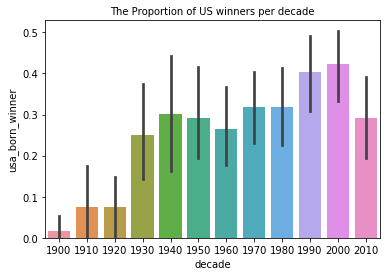

In [48]:
#using seaborn, plot the proportion of US winners by decade
import seaborn as sns
import matplotlib.pyplot as plt
#prop_usa_winners = nobel.groupby('decade')["usa_born_winner"].mean()
#sns.lmplot(x="decade",y="usa_born_winner", data = prop_usa_winners)
sns.barplot(x=nobel['decade'], y=nobel['usa_born_winner'])
plt.title('The Proportion of US winners per decade', fontsize=10)

What can you conclude from the graph?

* USA started to dominate in the last decade
* The values calculated are all proportioned thus I used a histogram to displayu the results as it it good for displaying variant values i.e. one of two or more values which exhibit usually slight differences

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

In [11]:
# Calculating the proportion of female laureates per decade

nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby('decade')["female_winner"].mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...

* Another method of getting the average is to sum the number of females and divide it by the number of all the sexes. i.e.

* prop_female_winners = sum(nobel['female_winner']/'sex')
* print(prop_female_winners)

In [12]:
print(prop_female_winners)

decade
1900    0.052632
1910    0.025000
1920    0.037037
1930    0.053571
1940    0.069767
1950    0.000000
1960    0.037975
1970    0.038462
1980    0.041237
1990    0.067308
2000    0.089431
2010    0.097561
Name: female_winner, dtype: float64


Text(0.5, 1.0, 'The proportion of female winners per decade, grouped by prize category')

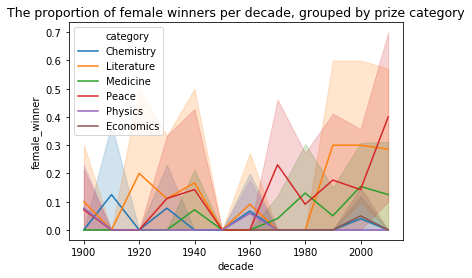

In [43]:
sns.lineplot(x = 'decade', y ='female_winner', hue = 'category', data= nobel)
plt.title('The proportion of female winners per decade, grouped by prize category', fontsize=12.5)



```
# This is formatted as code
```

 Interpret your plot here
 
 * In the 1950 decade, there were no nobel price female winners.
 This could be because more males were dominating o because there were other external factors that prevented the females from partaking in activities that could lead them to being Nobel Prize Candidates
 * Line plot was used it can take in many arguments i.e. category

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [14]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...

In [15]:
First_Woman_Winner = nobel[(nobel['sex'] == "Female")]
First_Woman_Winner.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True


 .head() function gives us the first 5 entries of the women winner. From the list of 5, it is easy to pick out who was the first winner.
 * The First Woman Winner is Marie Curie, née Sklodowska

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [16]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
laureates = nobel['full_name'].value_counts()
print(laureates)
#nobel.groupby('full_name').full_name.count() == 2


Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Marie Curie, née Sklodowska                                                          2
Linus Carl Pauling                                                                   2
Frederick Sanger                                                                     2
Arthur Holly Compton                                                                 1
United Nations Children's Fund (UNICEF)                                              1
Ernest Miller Hemingway                                                              1
International Campaign to Ban Landmines (ICBL)                                       1
Robert Bárány                                                                        1
Christopher A. Sims                        

How many people have received 2 or more prizes?

4 people. 2 organizations
* Comité international de la Croix Rouge (International Committee of the Red Cross)    3
* Linus Carl Pauling                                                                   2
* Frederick Sanger                                                                     2
* Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
* Marie Curie, née Sklodowska                                                          2
* John Bardeen                                                                         2

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [26]:
# Converting birth_date from String to datetime
from datetime import datetime
import pandas as pd
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
#print(type(nobel['birth_date']))
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 22 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null datetime64[ns]
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
usa_born_winner         911 non-null bool
decade                  911 non-null int32
female_winne

* First I imported datetime from datetime, then used the pd.to_datetime function to convert the birth_time column to datetime

* dt.year was then used to extract the age in the birth_date column. As this is a function that can subtract the datetime from the year if dataframe and and varibales are well defined

In [27]:
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year
print(nobel['age'])

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
5      56.0
6      50.0
7      85.0
8      45.0
9      69.0
10     59.0
11     49.0
12     37.0
13     44.0
14     71.0
15     43.0
16     75.0
17     51.0
18     44.0
19     36.0
20     52.0
21     74.0
22     72.0
23     55.0
24      NaN
25     62.0
26     70.0
27     59.0
28     62.0
29     62.0
       ... 
881    75.0
882    51.0
883    52.0
884    60.0
885    17.0
886    85.0
887    54.0
888    60.0
889    77.0
890    69.0
891    69.0
892    70.0
893    67.0
894    85.0
895    80.0
896    85.0
897     NaN
898    56.0
899    72.0
900    72.0
901    74.0
902    65.0
903    68.0
904    67.0
905    75.0
906    71.0
907    65.0
908    82.0
909    65.0
910    73.0
Name: age, Length: 911, dtype: float64


In question 1, numpy was imported as np, thus I was able to use it to do the following calculations i.e. mean and standard deviation

In [33]:
# What is the mean age of winners and it's standard devation? What is the median age?
nobel['age'].median()

60.0

In [34]:
nobel['age'].std()

12.39929042786365

## 9. Age differences between prize categories


Text(0.5, 1.0, 'The Nobal Candidates over the last 12 decades')

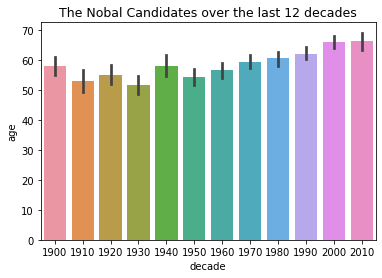

In [42]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...

sns.barplot(x=nobel['decade'], y=nobel['age'])
plt.title('The Nobal Candidates over the last 12 decades', fontsize=12.5)

Text(0.5, 1.0, 'The Categories of Nobal Candidates over the last 12 decades')

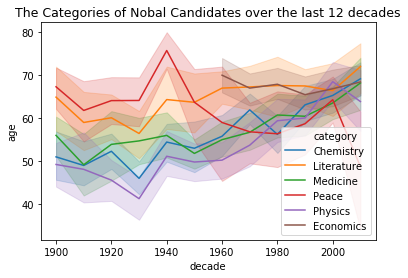

In [58]:
# Plot the age of nobel candidates by decade and prize category
sns.lineplot(x=nobel['decade'], y=nobel['age'], hue =nobel['category'])
plt.title('The Categories of Nobal Candidates over the last 12 decades', fontsize=12.5)

What can you conclude about the age at which people win different types of Nobel Prizes?
* The peace category has no under 50 year olds, mostly between 60-70 year olds
* Whereas the physics category had more young people i.e. under 50 year olds

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [ ]:
Old = nobel.age.max()
Young = nobel('age').min()
print(Old)
print(Young)

## Congratulations! You've reached the end of the challenge!